https://www.kaggle.com/code/fuzzywizard/rec-sys-collaborative-filtering-dl-techniques/notebook

# Rec Sys -> Collaborative Filtering & DL Techniques
* **You can also view and contribute to the notebook below.**
* **Github - [Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques](https://github.com/Chinmayrane16/Recommender-Systems-with-Collaborative-Filtering-and-Deep-Learning-Techniques)**
* **Do Star/Upvote if you like it :)**

# What are Recommendation Systems?

Every day we view and purchase products on Amazon, browse Netflix, stream music on Spotify. Have you ever wondered how accurately they know your tastes and preferences and make Recommendations based on your interests ?

The answer is they have personalized Recommendation Engines which uses advanced algorithms to recommend products to you... When you want to watch a new movie, you usually ask your friends for suggesting movies, they know your interests and accordingly they suggest you a good movie.

So, **Recommendation Systems work the same way, they are nothing but data filtering tools that uses algorithms to recommend most relevant items to a particular user.**

Now, let us understand Why do we need Recommendation Systems and in the later part we will look at How Recommender Systems actually work?

![](https://i.imgur.com/DlXYzzg.jpg)

# Why do we need Recommendation Systems?

Internet is a vast ocean of Information, it consists of millions of items, a really large catalogue of products. There are some Users that know what they are looking for whereas others have no idea what to look for in such a large library of resources, and thus, Recommendation Systems play a vital role.

There are some products which may be really good but have not gained **Popularity** since they have not been advertised, so recommendation systems help such items gain popularity by bringing such items to one's notice.

It even helps in **Ad Targeting**- Say you're looking to buy a new laptop on Internet, your recent searches are based on laptop suggestions, and soon you'll start seeing ads on websites offering discounts on laptops. So, Ad Targeting is an advertisement technique meant to deliver ads automatically by using specialized software and algorithms that place ads depending on the user’s recent searches. Ad targeting was pegged to have secured 2.7 times as much revenue as non-targeted ads, as shown by a study conducted in 2009 by the Network Advertising Initiative.

Thus, it also helps in **Increasing Revenues** of the product's Organization.

# Contents
1. [**Exploring the Dataset**](#there_you_go_1)
> *  [1.1 Importing Libraries ](#there_you_go_1.1)
  * [1.2 Extract dataset ](#there_you_go_1.2)
  >> * [1.2.1 Ratings](#there_you_go_1.2.1)
    * [1.2.2 Movies](#there_you_go_1.2.2)
  * [1.3 Combining the Movies and Ratings Dataframe ](#there_you_go_1.3)
2. [**Visualizing the Dataset**](#there_you_go_2)
> * [2.1 Genres ](#there_you_go_2.1)
  * [2.2 Heavily Rated Movies ](#there_you_go_2.2)
  * [2.3 Highly rated Movies](#there_you_go_2.3)
  * [2.4 Mean ratings vs Total number of ratings](#there_you_go_2.4)
3. [**Collaborative Filtering**](#there_you_go_3)
> * [3.1 Create User-Item Matrix ](#there_you_go_3.1)
 * [3.2 Memory Based CF ](#there_you_go_3.2)
 >> * [3.2.1 User Based CF](#there_you_go_3.2.1)
     * [3.2.2 Item based CF](#there_you_go_3.2.2)
 * [3.3 Model Based CF ](#there_you_go_3.3)
 >> * [3.3.1 K-Nearest Neighbour](#there_you_go_3.3.1)
    * [3.3.2 Singular Value Decomposition](#there_you_go_3.3.2)
    * [3.3.3 Non-Negative Matrix Factorization](#there_you_go_3.3.3)
4. [**Matrix Factorization using Deep Learning**](#there_you_go_4)
> * [4.1 Splitting Data into Train and Validation Set ](#there_you_go_4.1)
 * [4.2 Building the Model using Embedding Layers ](#there_you_go_4.2)
 * [4.3 Architecture 1 ](#there_you_go_4.3)
 * [4.4 Visulaizing the Model Architecture](#there_you_go_4.4)
 * [4.5 Compiling the Model ](#there_you_go_4.5)
 * [4.6 Fitting the Model](#there_you_go_4.6)
 * [4.7 Plotting Validation Curves](#there_you_go_4.7)
 * [4.8 Evaluating RMSE](#there_you_go_4.8)
 * [4.9 Architecture 2](#there_you_go_4.9)
 * [4.10 Visulaizing the Model Architecture](#there_you_go_4.10)
 * [4.11 Compiling the Model ](#there_you_go_4.11)
 * [4.12 Fitting the Model](#there_you_go_4.12)
 * [4.13 Plotting Validation Curves](#there_you_go_4.13)
 * [4.14 Evaluating RMSE](#there_you_go_4.14)
5. [**References**](#there_you_go_5)

<a id="there_you_go_1"></a>
# 1) Exploring the Dataset
The dataset we are going to use is the MovieLens Dataset, which cotains 100k ratings of approximately 9000 movies by 700 users.
Let's have a look at the dataset.

<a id="there_you_go_1.1"></a>
## 1.1) Importing the Libraries 

In [2]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
# from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



# Evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score


# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno


# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [4]:
import os
# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/Models/neural network'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)
else:
    print("El código se está ejecutando en un entorno local.")
    path_absolute = os.getcwd().replace("\\", "/")

datasets_path = "/datasets/"
path_absolute = path_absolute+datasets_path

El código se está ejecutando en un entorno local.


<a id="there_you_go_1.2"></a>
## 1.2) Extract Dataset

In [5]:
ratings = pd.read_csv(path_absolute+'ratings.csv')
movies = pd.read_csv(path_absolute+'movies.csv')
df_r = ratings.copy()
df_m = movies.copy()

<a id="there_you_go_1.2.1"></a>
### 1.2.1) Ratings

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


As you can see the "ratings" dataframe has 4 columns.
* **userId** - Every user is represented by an unique Id.
* **movieId** - Every movie is represented by an uniue Id.
* **rating** - Represents the rating given by the user to the corresponding movie.
* **timestamp** - The time at which the rating was recorded.

In [7]:
ratings.shape

(100004, 4)

In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


Some insights that can be drawn are:

1. The minimum rating given to the movie is 0,5 whereas the maximum rating given to the movies is 5.0
2. The average rating that is the mean ratings given by the users to all the movies is 3.5
3. The users have userId's in the range 1 - 610
4. The movies have movieId's in the range 1 - 193609.( Note that 193609 is the highest movieId and not total number of movies. )

Here, we will be dropping the timestamp attribute as we are not concerned with when the user rated a particular movie.

In [9]:
ratings.drop(['timestamp'], axis=1, inplace=True)

In [10]:
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


<a id="there_you_go_1.2.2"></a>
### 1.2.2) Movies

In [11]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


As you can see the "movies" dataframe has 3 columns:
* **movieId** - Every movie is represented by an unique Id.
* **title** - Movie which is represented by the corresponding movieId.
* **genres** - Represents category of the movie.

In [12]:
print('Shape: ', movies.shape, '\n')
movies.info()

Shape:  (9742, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


<a id="there_you_go_1.3"></a>
## 1.3) Combining the Movies and Ratings DataFrame
Let's have a combined view on both the ratings and movies dataframe.

And for that we need to merge on "movieId" attribute since it is common between both the dataframes.

In [13]:
df_combined = pd.merge(ratings, movies, on = 'movieId')

In [14]:
df_combined.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
1,7,31,3.0,Dangerous Minds (1995),Drama
2,31,31,4.0,Dangerous Minds (1995),Drama
3,32,31,4.0,Dangerous Minds (1995),Drama
4,36,31,3.0,Dangerous Minds (1995),Drama


In [15]:
df_combined.shape

(97243, 5)

<a id="there_you_go_2"></a>
# 2) Visualizations on the Dataset

<a id="there_you_go_2.1"></a>
## 2.1) Genres
Lets have a look at various genres in the Dataset.

In [16]:
# Create a function to find genres in the dataset

genres = {} # create a dictionary to store different genre values

def find_genres():
    for genre in movies['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1
            
find_genres()

In [17]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [18]:
# replace '(no genres listed)' by 'None'
genres['None'] = genres.pop('(no genres listed)')

<a id="there_you_go_2.1.1"></a>
### 2.1.1) Genre WordCloud

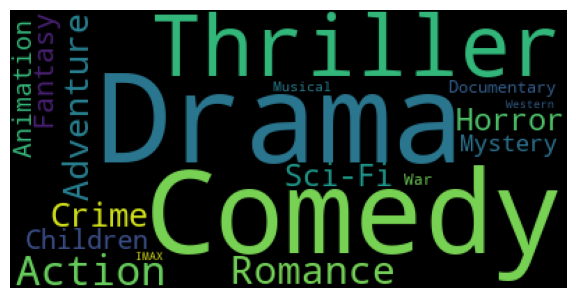

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=400, height=200, background_color = 'black', min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<a id="there_you_go_2.2"></a>
## 2.2) Heavily Rated Movies

In [20]:
df_n_ratings = pd.DataFrame(df_combined.groupby('title')['rating'].mean())
df_n_ratings['total ratings'] = pd.DataFrame(df_combined.groupby('title')['rating'].count())
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.054252,341
Pulp Fiction (1994),4.256173,324
"Shawshank Redemption, The (1994)",4.487138,311
"Silence of the Lambs, The (1991)",4.138158,304
Star Wars: Episode IV - A New Hope (1977),4.221649,291
Jurassic Park (1993),3.706204,274
"Matrix, The (1999)",4.183398,259
Toy Story (1995),3.872470,247
Schindler's List (1993),4.303279,244


Most of these movies stand among the Top 50 movies in the IMDB ratings even today.

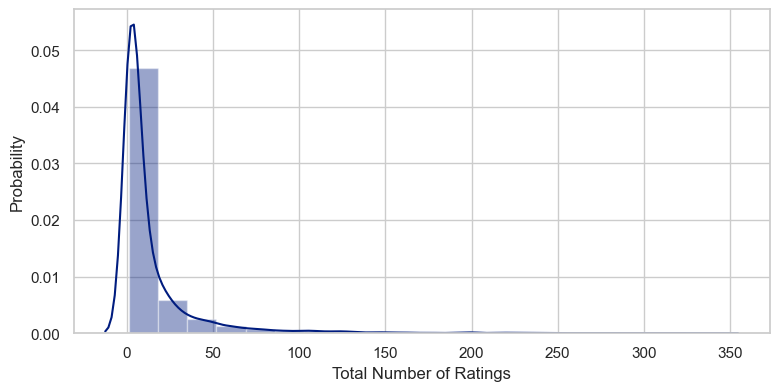

In [21]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['total ratings'], bins=20)
plt.xlabel('Total Number of Ratings')
plt.ylabel('Probability')
plt.show()

We can see that - 
* Majority of the movies have less than 50 ratings.
* The number of movies having more than 100 ratings is very low.

Refer one cell above, we can see that there are only 3 movies with 300+ ratings.

<a id="there_you_go_2.3"></a>
## 2.3) Highly Rated Movies

In [22]:
df_n_ratings.sort_values('mean ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
"Family Stone, The (2005)",5.0,1
"Kidnapping, Caucasian Style (Kavkazskaya plennitsa) (1967)",5.0,1
Female Perversions (1996),5.0,1
"Grass Is Greener, The (1960)",5.0,1
Ben X (2007),5.0,1
Ben-hur (2016),5.0,1
Supercop 2 (Project S) (Chao ji ji hua) (1993),5.0,1
"Night of the Shooting Stars (Notte di San Lorenzo, La) (1982)",5.0,1
"Two Escobars, The (2010)",5.0,1


In [23]:
print('Total no of users that gave rating of 5.0 : ', len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]), '\n')
print('Total no of Individual users that gave rating of 5.0 : ', len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) 
                                                                           & (df_n_ratings['total ratings'] == 1)]))

Total no of users that gave rating of 5.0 :  147 

Total no of Individual users that gave rating of 5.0 :  137


1. As you can see there are over 296 users that have rated 5 stars, among which there are 289 individual raters ( only user to rate the movie 5 star ).

2. So, this cannot be the lone factor that should be considered while recommending movies. As this factor only shows the preferences of a particular user.

3. It would make a good recommendation system if we can use both the factors ( -> Highly Rated Movies and Heavily Rated Movies <- ) together.

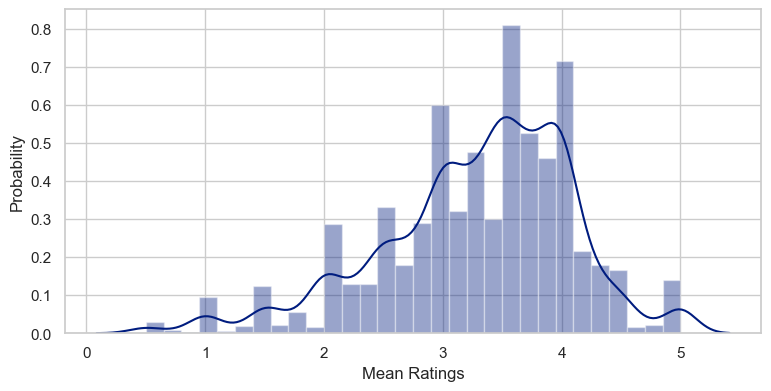

In [24]:
plt.figure(figsize=(8,4))
sns.distplot(df_n_ratings['mean ratings'], bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Probability')
plt.show()

<a id="there_you_go_2.4"></a>
## 2.4) Mean Ratings vs Total Number of Ratings

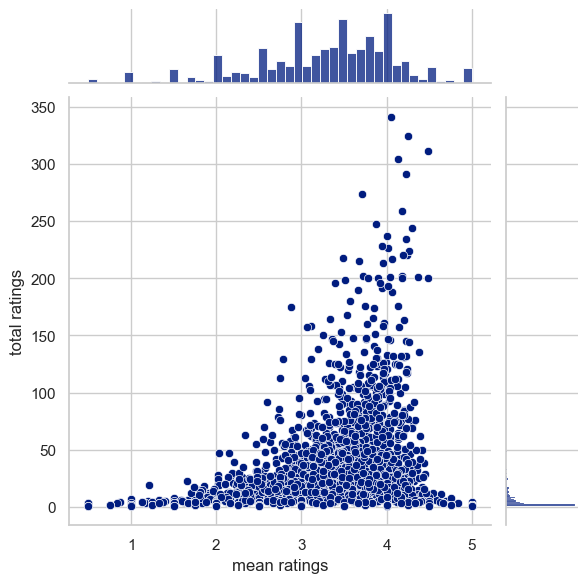

In [25]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings )

* Here, as you can see every Data Point represents a distinct Movie, with y-coordinate representing the total no of users which has rated that movie and x-coordinate representing the mean of all the ratings of the corresponding users.
* Also you can see that there is a huge Density in the region corresponding to 0-50 no of users and between mean rating 3-4 .

Many more Visualizations can be drawn and many different conclusions can be inferred, But here, I'm going to focus on Collaborative Filtering.

So, let's proceed to what is Collaborative Filtering and how it is used in Recommendation Systems?

<a id="there_you_go_3"></a>
# 3) Collaborative Filtering (CF)

**Collaborative filtering** is the process of filtering for information or patterns using techniques involving collaboration among multiple agents, viewpoints, data sources.Basically, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users. 

There are 2 approaches to CF -->

1) **Memory-Based CF** - It is an approach which finds similarity between users or between items to recommend similar items. Examples include Neighbourhood-based CF and Item-based/User-based top-N recommendations.

2) **Model-Based CF** - In this approach we use different data mining, machine learning algorithms to predict users' rating of unrated items.  Examples include Singular Value Decomposition (SVD) , Principal Component Analysis (PCA) etc.

<a id="there_you_go_3.1"></a>
## 3.1) Create User-Item Matrix

In [26]:
util_mat = df_combined.pivot_table(index = 'userId', columns = 'title', values = 'rating')
util_mat.head(20)

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="there_you_go_3.2"></a>
## 3.2) Memory Based Collaborative Filtering

There are 2 approaches to Memory-Based CF -->

1) **User-User Collaborative Filtering** - In this we we calculate similarity of all the users to the active user ( the user whom the prediction is for ).Then sort and filter the Top-N users to make predictions for the active user. This is usually very effective but takes a lot of time and resources. For example if Dennis and Davis like the same movies and a new movie comes out that Davis likes,then we can recommend that movie to Dennis because Davis and Dennis seem to like the same movies.

2) **Item-Item Collaborative Filtering** - This is similar to User-User CF, just that we now compute similarity between items to recommend similar items. Eg. When you buy any product on Amazon, you will find this line "Users who bought this item also bought...", so Amazon uses item-item CF widely, Mind that I'm not saying they use only item-item CF, they have hybrid techniques to better suit users of even unique interests.

Item-Item CF are a lot faster than User-User CF. and secondly user profiles changes quickly and the entire system model has to be recomputed, whereas item's average ratings doesn't change that quickly, and this leads to more stable rating distributions in the model, so the model doesn't have to be rebuilt as often.

**Q) How do we calculate similarity?**

**Ans.** There are many measures to calculate the similarity matrix, some of them are -->

1) **Jaccard Similarity** - It is a statistic used for comparing the similarity and diversity of sample sets. It is defined as the size of the intersection divided by the size of the union of the sample sets.

2) **Cosine Similarity** - It measures the angle between the ratings vector. If the angle is 0°, then they are vectors having same orientation and if the angle is 180°, then they are highly dissimilar vectors.

3) **Pearson Similarity** - It is actually Centered-Cosine similarity. We subtract the mean ratings from the user ratings, so that the mean is centered at 0, and then calculate the cosine similarity.

<a id="there_you_go_3.2.1"></a>
### 3.2.1) User based Collaborative Filtering

In [27]:
user_util_matrix = util_mat.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
user_util_matrix = user_util_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)
user_util_matrix.head(5)

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,...,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000,2.550000
2,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,...,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842,3.486842
3,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,...,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000,3.560000
4,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,...,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828,4.344828
5,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,...,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000,3.910000


In [28]:
user_util_matrix.T.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000e+00,-6.062250e-16,2.944255e-16,0.003670,-0.002274,6.961829e-16,-0.070321,-1.153311e-15,0.042632,8.520700e-16,...,7.079662e-16,-4.734789e-17,0.018763,0.001080,-3.191899e-16,7.397360e-16,3.089192e-16,4.409492e-02,6.069994e-16,-0.013096
2,-6.062250e-16,1.000000e+00,-1.624645e-03,-0.004808,0.012639,-6.367915e-16,0.042691,2.106603e-02,0.011109,-7.989496e-03,...,-1.824770e-02,-2.198977e-02,0.019028,-0.059174,2.851502e-02,-1.068281e-01,-7.998716e-03,-4.162816e-02,-9.023348e-02,0.056258
3,2.944255e-16,-1.624645e-03,1.000000e+00,0.019333,-0.025822,-6.276732e-02,0.055066,2.723957e-02,-0.035899,3.829264e-02,...,4.540476e-02,2.099835e-02,0.073035,0.031811,1.445607e-01,9.716110e-02,2.835138e-02,8.988934e-02,-9.364080e-03,0.062980
4,3.670315e-03,-4.807989e-03,1.933337e-02,1.000000,0.010801,1.933895e-02,0.057747,5.553965e-02,-0.010506,5.157652e-03,...,1.198634e-02,7.357804e-03,0.028093,0.093056,2.148933e-02,4.084197e-02,1.849212e-02,2.881302e-02,1.977050e-02,0.032945
5,-2.274173e-03,1.263945e-02,-2.582247e-02,0.010801,1.000000,-5.843286e-03,-0.015075,-3.888612e-02,0.013708,3.050043e-02,...,4.613436e-02,1.993995e-03,0.001622,0.037034,-3.826929e-02,-1.953717e-02,-7.172134e-02,3.759695e-03,-2.945517e-02,-0.036814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,7.397360e-16,-1.068281e-01,9.716110e-02,0.040842,-0.019537,3.166543e-16,0.048268,2.380021e-02,0.042599,3.677591e-02,...,4.885788e-04,1.368224e-03,0.037899,0.019739,9.404957e-02,1.000000e+00,8.706946e-02,-3.260577e-03,-5.466801e-03,0.035538
668,3.089192e-16,-7.998716e-03,2.835138e-02,0.018492,-0.071721,-6.875973e-03,-0.015626,1.182188e-02,0.054536,2.669090e-02,...,-2.540580e-03,2.766820e-02,0.043736,0.026903,7.196982e-02,8.706946e-02,1.000000e+00,7.352681e-16,8.699100e-02,0.028488
669,4.409492e-02,-4.162816e-02,8.988934e-02,0.028813,0.003760,-5.780024e-03,0.037506,-9.157719e-03,0.004907,-9.258005e-03,...,3.812793e-03,6.241381e-03,0.045692,0.079640,-1.033131e-02,-3.260577e-03,7.352681e-16,1.000000e+00,2.095823e-02,0.045097


In [29]:
user_corr_mat = user_util_matrix.T.corr()
corr_user_1 = user_corr_mat.iloc[0]

For convinience, I will be be considering only the correlation of all users with the first user only.

In [30]:
corr_user_1.sort_values(ascending=False, inplace=True)

In [31]:
corr_user_1

userId
1      1.000000
35     0.192699
197    0.191875
539    0.149320
68     0.141018
         ...   
474   -0.067785
81    -0.069807
7     -0.070321
257   -0.079576
586   -0.083742
Name: 1, Length: 671, dtype: float64

In [32]:
# NaN values are generated in corr() as the std dev is zero, which is required in calculating Pearson Similarity.
corr_user_1.dropna(inplace = True)

In [33]:
# Neglect the 1st corr value as it is user1 itself
top50_corr_users = corr_user_1[1:51]

Below, we have list of all movies that user 1 has ever rated.

In [34]:
df_combined[ df_combined['userId'] == 1]

,userId,movieId,rating,title,genres
0,1,31,2.5,Dangerous Minds (1995),Drama
42,1,1029,3.0,Dumbo (1941),Animation|Children|Drama|Musical
84,1,1061,3.0,Sleepers (1996),Thriller
117,1,1129,2.0,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
165,1,1172,4.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
211,1,1263,2.0,"Deer Hunter, The (1978)",Drama|War
259,1,1287,2.0,Ben-Hur (1959),Action|Adventure|Drama
305,1,1293,2.0,Gandhi (1982),Drama
351,1,1339,3.5,Dracula (Bram Stoker's Dracula) (1992),Fantasy|Horror|Romance|Thriller
403,1,1343,2.0,Cape Fear (1991),Thriller


In [35]:
# user1 has not rated 32 movie
df_combined[ (df_combined['userId'] == 1) & (df_combined['movieId'] == 32) ] 

,userId,movieId,rating,title,genres


In [36]:
print('32nd Movie : ', movies['title'][ movies['movieId'] == 32 ].values)

32nd Movie :  ['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']


So, let's calculate what ratings user 1 would give to the movie with the help of similarrity vector. And based on that rating, we can compare it with a threshold rating. If the rating is higher it will be visible to the active user in his/her recommended list.

In [37]:
df_n_ratings.loc[['Twelve Monkeys (a.k.a. 12 Monkeys) (1995)']]

,mean ratings,total ratings
title,,
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.923469,196


In [38]:
top50_users = top50_corr_users.keys()

count = 0
users = list()
for user in top50_users:
    if df_combined[ (df_combined['userId'] == user) & (df_combined['movieId'] == 32) ]['rating'].sum()  :
        count +=1
        users.append(user)

print(count)

19


There are 30 similar users among the Top-50 similar users that have rated the movie "The Twelve Monkeys".

* Now, let's calculate the rating user 1 would give to the movie, 

* **Predicted rating** = sum of [ (weights) * (ratings) ]  **/** sum of  (weights)

Here, *weights* is the correlation of the corresponding user with the first user.



In [39]:
# Let's define a function to calculate what user1 will rate the movie
# We use Weighted average of k similar users

def predict_rating():
    sum_similarity = 0
    weighted_ratings = 0
    for user in users:
        weighted_ratings += top50_corr_users.ix[user] * df_combined[ (df_combined['userId'] == user) & 
                                                              (df_combined['movieId'] == 32) ]['rating'].sum()
        sum_similarity += top50_corr_users.ix[user]

    print(weighted_ratings / sum_similarity)
    
    
predict_rating()

AttributeError: 'Series' object has no attribute 'ix'

In [ ]:
df_m[ df_m['movieId'] == 32]

Well there are pretty good changes of recommending this movie movie to the 1st user, since the rating is quite good.

So, this is how a naive User-based CF works. Predicted ratings are calculated similarly for every user, (obviously for the movies he's not rated) and depending upon the threshold rating, the movie is either displayed on his recommended list or discarded.

<a id="there_you_go_3.2.2"></a>
### 3.2.2) Item Based Collaborative Filtering


* It is quite similar to previous algorithm, but instead of finding user's look-alike, we try finding movie's look-alike. 
* Once we have movie's look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset.

![Imgur](https://i.imgur.com/wKMnQiU.jpg)

In [40]:
# Let's find similar movies to jurassic Park
df_n_ratings.loc[['Jurassic Park (1993)']]

,mean ratings,total ratings
title,,
Jurassic Park (1993),3.706204,274


In [41]:
item_util_matrix = util_mat.copy()
item_util_matrix.head(10)

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# We will fill the column wise NaN's with the corresponding movie's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the user that has not a rated movie.

item_util_matrix = item_util_matrix.apply(lambda col : col.fillna(col.mean()), axis=0)
item_util_matrix.head(5)

title,'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),1-900 (06) (1994),...,Zoom (2006),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,2.0,2.25,3.5,2.625,3.052632,5.0,3.755556,3.142857,3.692308,4.0,...,2.5,4.0,4.0,1.5,3.333333,3.125,2.478261,1.0,3.258065,4.5
2,2.0,2.25,3.5,2.625,3.052632,5.0,3.755556,3.142857,3.692308,4.0,...,2.5,4.0,4.0,1.5,3.333333,3.125,2.478261,1.0,3.258065,4.5
3,2.0,2.25,3.5,2.625,3.052632,5.0,3.755556,3.142857,3.692308,4.0,...,2.5,4.0,4.0,1.5,3.333333,3.125,2.478261,1.0,3.258065,4.5
4,2.0,2.25,3.5,2.625,3.052632,5.0,3.755556,3.142857,3.692308,4.0,...,2.5,4.0,4.0,1.5,3.333333,3.125,2.478261,1.0,3.258065,4.5
5,2.0,2.25,3.5,2.625,3.052632,5.0,3.755556,3.142857,3.692308,4.0,...,2.5,4.0,4.0,1.5,3.333333,3.125,2.478261,1.0,3.258065,4.5


In [43]:
item_util_matrix.isna().sum().sum()

0

This signifies that every Movie is rated by atleast 1 user.

In [44]:
item_util_matrix.corr()

KeyboardInterrupt: 

* There are lot of NaN values and that is because when we are calculating the Pearson correlation, if the rating vector has all the values same for eg -> [3.0 , 3.0, 3.0, 3.0, ....], then the **Standard Deviation** is zero and division by zero is undefined, and thus its correlation with any other rating vector is NaN.

* Since there are many movies that are rated only by 1 user , there the whole column mean is filled with the rating of that user, and therefore it's Pearson correlation gives NaN values with any other column.

In [ ]:
item_corr_matrix = item_util_matrix.corr()

In [ ]:
jurassic_park_corr = item_corr_matrix['Jurassic Park (1993)']
jurassic_park_corr = jurassic_park_corr.sort_values(ascending=False)
jurassic_park_corr.dropna(inplace=True)

In [ ]:
movies_similar_to_jurassic_park = pd.DataFrame(data=jurassic_park_corr.values, columns=['Correlation'], 
                                               index = jurassic_park_corr.index)
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park.join(df_n_ratings['total ratings'])
movies_similar_to_jurassic_park.head(10)

In [ ]:
movies_similar_to_jurassic_park = movies_similar_to_jurassic_park[1:]
movies_similar_to_jurassic_park[ movies_similar_to_jurassic_park['total ratings'] > 100 ].sort_values(ascending=False,
                                                                                          by=['Correlation']).head(10)

<a id="there_you_go_3.3"></a>
## 3.3) Model Based Collaborative Filtering

Here we will be using dimensionality reduction methods to improve robustness and accuracy of Memory-Based CF. Basically, we compress user-item matrix into a low dimension matrix. We use techniques like SVD which is a low-rank factorization method, PCA which is used for dimensionaliry reduction etc.

Model-based methods are based on matrix factorization and are better at dealing with sparsity. 
* We will be using a "Surprise" library to implement SVD, KNN and NMF.
* You can find its documentation here >  [https://surprise.readthedocs.io/en/stable/](https://surprise.readthedocs.io/en/stable/)
* Surprise Library has almost all the algorithms implemented that are required for model-based Recommendation systems.

In [ ]:
from surprise import Reader, Dataset, evaluate, KNNBasic, SVD, NMF
from surprise.model_selection import GridSearchCV, cross_validate

To load a dataset from a pandas dataframe, you will need the **load_from_df()** method. You will also need a **Reader** object, but only the rating_scale parameter must be specified.

The Reader class is used to parse a file containing ratings.

In [ ]:
reader = Reader(rating_scale=(0.5, 5.0))

data = Dataset.load_from_df( ratings[['userId', 'movieId', 'rating']], reader = reader )

<a id="there_you_go_3.3.1"></a>
### 3.3.1) K-Nearest Neighbours (KNN)

In [ ]:
# Split data into k-folds
# data.split(n_folds=5)

In [ ]:
# Compute Mean Squared Distance Similarity
sim_options = {'name' : 'msd'}

algo = KNNBasic(k=20, sim_options=sim_options )
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

**Tuning KNN using GridSearchCV**

In [ ]:
n_neighbours = [10, 20, 30]
param_grid = {'n_neighbours' : n_neighbours}

gs = GridSearchCV(KNNBasic, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

<a id="there_you_go_3.3.2"></a>
### 3.3.2) Singular Value Decomposition (SVD)

In [ ]:
algo = SVD()
cross_validate(algo=algo, data=data, measures=['RMSE'], cv=5, verbose=True)

**Fine Tuning SVD using GridSearchCV**

[Click here to view the parameters](https://surprise.readthedocs.io/en/stable/matrix_factorization.html)

In [ ]:
param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}

gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
gs.fit(data)

print('\n###############')
# Best RMSE score
print('Best Score :', gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print('Best Parameters :', gs.best_params['rmse'])
print('###############')

<a id="there_you_go_3.3.3"></a>
### 3.3.3) Non-Negative Matrix Factorization (NMF)

In [ ]:
algo = NMF()
cross_validate(data=data, algo=algo, measures=['RMSE'], cv=5, verbose=True)

<a id="there_you_go_4"></a>
# 4) Matrix Factorization using Deep Learning (Keras)

In [45]:
from keras.layers import Embedding, Input, dot, concatenate
from keras.models import Model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

<a id="there_you_go_4.1"></a>
## 4.1)Splitting Data into Train and Validation Set

In [46]:
X = ratings.iloc[:,:2]
Y = ratings.iloc[:,2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 66)

<a id="there_you_go_4.2"></a>
## 4.2) Building the Model using Embedding Layers

An embedding is a mapping from discrete objects, such as words or movies in our case, to a vector of continuous values. These are used to find similarities between discrete objects. 

The concept behind matrix factorization models is that the preferences of a user can be determined by a small number of hidden factors. And these are called as **Embeddings**.

![Imgur](https://i.imgur.com/zGQJFLD.png)

As you can see in the image, there are 2 features both for user and the items. These are the latent factors or the hidden factors. These factors have a value for the corresponding user and determines to what extend that user likes the feature.

For Eg. the features for the user could be ->
* How much he likes action movies?
* Whether he likes old movies?

And the features for the movies could be ->
* To what scale is it an action movie?
* Whether the movie is recently released?

And finally we take **dot product** which gives us the user's rating for the movie, 

**Estimated Rating** = [ (How much he likes action movies?) x (To what scale is it an action movie) ]  +  [ (Whether he likes old movies?) x (Whether the movie is recently released) ]

In [47]:
# The number of latent factors for the embedding
n_latent_factors = 50

# no of users and movies
n_users, n_movies = len(ratings['userId'].unique()), len(ratings['movieId'].unique()) 

<a id="there_you_go_4.3"></a>
## 4.3) Architecture 1

In [48]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)


# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)


# Dot Product
merged_vectors = dot([user_vector, movie_vector], name='Dot_Product', axes=1)
model = Model([user_input, movie_input], merged_vectors)

<a id="there_you_go_4.4"></a>
## 4.4) Visualizing the Model Architecture

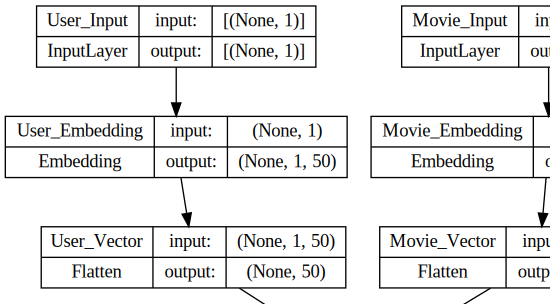

In [49]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 User_Input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 Movie_Input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 User_Embedding (Embedding)     (None, 1, 50)        33550       ['User_Input[0][0]']             
                                                                                                  
 Movie_Embedding (Embedding)    (None, 1, 50)        453300      ['Movie_Input[0][0]']            
                                                                                              


<a id="there_you_go_4.5"></a>
## 4.5) Compiling the Model

In [51]:
optimizer = Adam(lr = 0.0005)

model.compile(loss='mean_squared_error', optimizer = optimizer)

<a id="there_you_go_4.6"></a>
## 4.6) Fitting the Model

In [52]:
batch_size = 128
epochs = 20

In [53]:
history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userId'], x_test['movieId']], y_test))

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'model/Movie_Embedding/embedding_lookup' defined at (most recent call last):
    File "c:\Users\jaime\Anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\jaime\Anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "c:\Users\jaime\Anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "c:\Users\jaime\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\jaime\Anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\jaime\Anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "c:\Users\jaime\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "c:\Users\jaime\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\jaime\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\jaime\AppData\Local\Temp\ipykernel_21760\1177684413.py", line 1, in <module>
      history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs,
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\jaime\Anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 208, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model/Movie_Embedding/embedding_lookup'
indices[3,0] = 73759 is not in [0, 9066)
	 [[{{node model/Movie_Embedding/embedding_lookup}}]] [Op:__inference_train_function_713]

<a id="there_you_go_4.7"></a>
## 4.7) Plotting Validation Curves

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<a id="there_you_go_4."></a>
## 4.8) Evaluating RMSE

In [ ]:
score = model.evaluate([x_test['userId'], x_test['movieId']], y_test)
print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

<a id="there_you_go_4.9"></a>
## 4.9) Architecture 2
In this architecture we will be concatenating the latent factors and use Dense layers to calculate the predicted ratings. 

Have a look at the image below ->
![Imgur](https://i.imgur.com/GIe3gTZ.png)

In [ ]:
# Model Architecture


# User Embeddings
user_input = Input(shape=(1,), name='User_Input')
user_embeddings = Embedding(input_dim = n_users, output_dim=n_latent_factors, input_length=1, 
                              name='User_Embedding') (user_input)
user_vector = Flatten(name='User_Vector') (user_embeddings)



# Movie Embeddings
movie_input = Input(shape=(1,), name='Movie_Input')
movie_embeddings = Embedding(input_dim = n_movies, output_dim=n_latent_factors, input_length=1, 
                               name='Movie_Embedding') (movie_input)
movie_vector = Flatten(name='Movie_Vector') (movie_embeddings)




# Concatenate Product
merged_vectors = concatenate([user_vector, movie_vector], name='Concantenate')
dense_layer_1 = Dense(100, activation='relu')(merged_vectors) 
# dense_layer_1 = Dropout(0.25) (dense_layer_1)
# batchnorm_layer_1 = BatchNormalization()(dense_layer_1)
# dense_layer_2 = Dense(64, activation='relu')(merged_vectors)


result = Dense(1)(dense_layer_1)
model = Model([user_input, movie_input], result)

<a id="there_you_go_4.10"></a>
## 4.10) Visualizing the Model Architecture

In [ ]:
SVG(model_to_dot( model,  show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [ ]:
model.summary()

<a id="there_you_go_4.11"></a>
## 4.11) Compiling the Model

In [ ]:
optimizer = Adam(lr=0.0002)

In [ ]:
model.compile(loss='mean_squared_error', optimizer=optimizer)

<a id="there_you_go_4.12"></a>
## 4.12) Fitting the Model

In [ ]:
batch_size = 128
epochs = 20

In [ ]:
history = model.fit(x=[x_train['userId'], x_train['movieId']], y=y_train, batch_size= batch_size, epochs=epochs, 
                    verbose= 2, validation_data=([x_test['userId'], x_test['movieId']], y_test))

<a id="there_you_go_4.13"></a>
## 4.13) Plotting Validation Curves

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.figure(figsize = (8,4))
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

<a id="there_you_go_4.14"></a>
## 4.14) Evaluating RMSE

In [ ]:
score = model.evaluate([x_test['userId'], x_test['movieId']], y_test)

print()
print('RMSE: {:.4f}'.format(np.sqrt(score)))

So, as you could see the latter architecture did a pretty good job in predicting the user ratings. You can try tuning the number of latent factors, also try changing the architecture, adding more layers (make sure it doesn't overfit) and introducing Dropout and BatchNorm layers to acheive even lower RMSE.

<a id="there_you_go_5"></a>
# 5) References
1.  Linear Algebra - [Good for quick revision](https://www.kaggle.com/mjbahmani/linear-algebra-for-data-scientists)
2. Stanford lectures - [Starts at Lecure 41 and you can proceed as much you need, covers CF, SVD and much more](https://www.youtube.com/watch?v=1JRrCEgiyHM&index=41&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV)
3. Blogs - [Various Implementations of Collaborative Filtering](https://towardsdatascience.com/various-implementations-of-collaborative-filtering-100385c6dfe0)
4. Deep Learning Blog - [Implementing recommendation systems in keras](https://nipunbatra.github.io/blog/2017/recommend-keras.html)
5. Matrix Factorization - [Understanding how Matrix Factorization works](https://lazyprogrammer.me/tutorial-on-collaborative-filtering-and-matrix-factorization-in-python/)
6. Surprise Package - [Library to implement Model-Based CF Algorithms](https://surprise.readthedocs.io/en/stable/)

*Thank you...*

*Do star/upvote if you like it ;)*